In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [11]:
granite = pd.read_csv("/Users/lixinjin/Desktop/GeorgiaTech/fall2022_VIP/Gr1.csv")
granite = granite.iloc[2:102]
# granite.head(5)
granite_new = granite[[' Hardness(GPa)', ' Modulus', ' X', ' Y']]
granite_new.rename(columns={' Hardness(GPa)': 'Hardness', ' Modulus': 'Modulus', ' X': 'X', ' Y': 'Y'}, inplace=True)
granite_new.index = np.arange(1, len(granite_new) + 1)

### Using 1.5IQR rule to remove outliers
#### Lower Bound: (Q1 - 1.5 * IQR) 
#### Upper Bound: (Q3 + 1.5 * IQR)

In [12]:
# Define the function to remove outliers
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

granite_removed = remove_outlier_IQR(granite_new)
granite_removed = pd.DataFrame(granite_removed)
granite_removed

,Hardness,Modulus,X,Y
1,0.387642,6.648113,-3.770873228,0.002520166
2,1.224675,32.848149,-2.771180807,0.002698761
3,NaN,NaN,-1.771468543,0.002708683
4,1.841265,37.080645,-0.771160963,0.002708683
5,10.465644,178.110457,0.228789427,0.002698761
...,...,...,...,...
96,25.739224,211.007222,1.228045284,-8.997162332
97,42.664982,NaN,2.227499578,-8.997162332
98,NaN,362.929558,3.227747626,-8.997162332
99,26.693745,185.871818,4.22771786,-8.997162332


In [16]:
granite_removed = granite_removed.interpolate(axis=0) # default method: linear
granite_removed # outliers problem

,Hardness,Modulus,X,Y
1,0.387642,6.648113,-3.770873228,0.002520166
2,1.224675,32.848149,-2.771180807,0.002698761
3,1.532970,34.964397,-1.771468543,0.002708683
4,1.841265,37.080645,-0.771160963,0.002708683
5,10.465644,178.110457,0.228789427,0.002698761
...,...,...,...,...
96,25.739224,211.007222,1.228045284,-8.997162332
97,42.664982,286.968390,2.227499578,-8.997162332
98,34.679363,362.929558,3.227747626,-8.997162332
99,26.693745,185.871818,4.22771786,-8.997162332


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'with outliers')

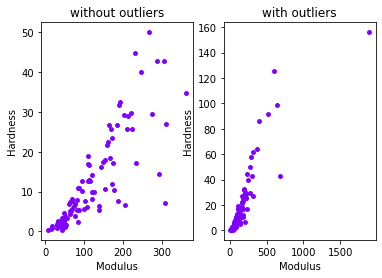

In [18]:
import matplotlib.cm as cm 
colors = cm.rainbow(np.linspace(0, 1, granite_removed['Hardness'].shape[0]))
plt.figure(figsize=(6,4))
plt.subplot(1, 2, 1)
plt.scatter(x = granite_removed['Modulus'], y = granite_removed['Hardness'], s = 15, c = colors[0])
plt.xlabel("Modulus")
plt.ylabel("Hardness")
plt.title("without outliers")

plt.subplot(1, 2, 2)
plt.scatter(x = granite_new['Modulus'], y = granite_new['Hardness'], s = 15, c = colors[0])
plt.xlabel("Modulus")
plt.ylabel("Hardness")
plt.title("with outliers")

In [20]:
# Normolization
hardness_diff = granite_removed["Hardness"].max() - granite_removed["Hardness"].min()
granite_removed["Hardness"] = (granite_removed["Hardness"].sub(granite_removed["Hardness"].min(), fill_value=0)) / hardness_diff

modulus_diff = granite_removed["Modulus"].max() - granite_removed["Modulus"].min()
granite_removed["Modulus"] = (granite_removed["Modulus"].sub(granite_removed["Modulus"].min(), fill_value=0)) / modulus_diff

In [21]:
granite_removed.head(10) # dataset after normalization

,Hardness,Modulus,X,Y
1,0.000517,0.000000,-3.770873228,0.002520166
2,0.017389,0.073537,-2.771180807,0.002698761
3,0.023602,0.079477,-1.771468543,0.002708683
4,0.029816,0.085417,-0.771160963,0.002708683
5,0.203648,0.481255,0.228789427,0.002698761
6,0.208729,0.410349,1.228422316,0.002708683
7,0.854702,0.836553,2.228809271,0.002708683
8,0.582784,0.553095,3.228710052,0.002708683
9,0.276862,0.316251,4.228501692,0.002708683
10,0.117933,0.282911,5.228739818,0.002708683


In [22]:
# GMM
from sklearn.mixture import GaussianMixture 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [24]:
granite_subset = granite_removed[['Hardness', 'Modulus']]

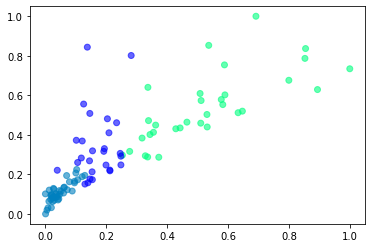

In [25]:
gmm_granite = gmm = GaussianMixture(n_components = 3) 
gmm.fit(granite_subset)

plt.scatter(granite_subset["Hardness"], granite_subset["Modulus"],  
           c = GaussianMixture(n_components = 3).fit_predict(granite_subset), cmap =plt.cm.winter, alpha = 0.6) 
plt.show() 

Text(0.5, 1.0, 'AIC of # Clusters')

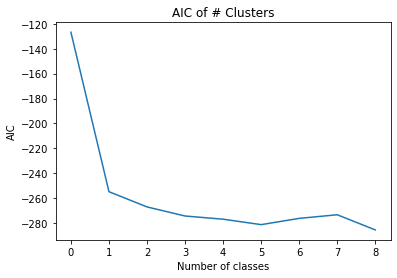

In [26]:
AIC=np.array([]);
for K in range(1,10):
    gmm = GaussianMixture(n_components=K)
    gmm.fit_predict(granite_subset)
    aic=gmm.aic(granite_subset)
    AIC=np.append(AIC,aic)

plt.plot(AIC); 
plt.xlabel('Number of classes'); 
plt.ylabel('AIC')
plt.title('AIC of # Clusters')

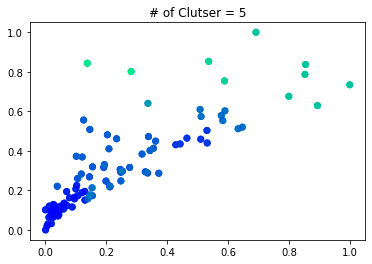

In [27]:
for i in range(2, 6):
    plt.scatter(granite_subset["Hardness"], granite_subset["Modulus"],  
           c = GaussianMixture(n_components = i).fit_predict(granite_subset), cmap =plt.cm.winter, alpha = 0.6) 
    plt.title("# of Clutser = " + str(i))
    #plt.show()   # mean and variance of 

In [30]:
# add a new column based on cluster = 4
# df['NEW_COLUMN'] = pd.Series(predict, index=df.index)
gmm_granite = gmm = GaussianMixture(n_components = 4) 
gmm.fit(granite_subset)
predict = gmm.predict(granite_subset)
granite_removed['label'] = pd.Series(predict, index=granite_removed.index)
#granite_remoevd

In [32]:
dataset = granite_removed.iloc[:,0:4]
dataset["X"] = pd.to_numeric(dataset["X"])
dataset["Y"] = pd.to_numeric(dataset["Y"])
# print(reshape_set.dtypes)
dataset = (dataset - dataset.min())/(dataset.max() - dataset.min())
dataset.head()

,Hardness,Modulus,X,Y
1,0.000517,0.000000,0.000052,0.999979
2,0.017389,0.073537,0.111125,0.999999
3,0.023602,0.079477,0.222200,1.000000
4,0.029816,0.085417,0.333341,1.000000
5,0.203648,0.481255,0.444443,0.999999


In [34]:
norm_hardness = granite_removed['Hardness']
norm_modulus = granite_removed['Modulus']
norm_x = dataset["X"]
norm_y = dataset["Y"]
gmm_label = granite_removed['label']

No handles with labels found to put in legend.


Text(0, 0.5, 'y coordinate value')

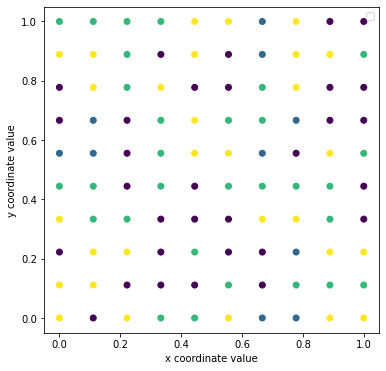

In [37]:
plt.rcParams["figure.figsize"] = (6,6)
plt.scatter(dataset["X"], dataset["Y"], c = granite_removed["label"])
plt.legend()
plt.xlabel("x coordinate value")
plt.ylabel("y coordinate value")

## Add more data points

In [38]:
import scipy as sp
import scipy.interpolate
from scipy.interpolate import griddata
roundset = dataset
roundset['X'] = round(roundset['X'], 2)
roundset['Y'] = round(roundset['Y'], 2)
roundset.head(20)

,Hardness,Modulus,X,Y
1,0.000517,0.000000,0.00,1.00
2,0.017389,0.073537,0.11,1.00
3,0.023602,0.079477,0.22,1.00
4,0.029816,0.085417,0.33,1.00
5,0.203648,0.481255,0.44,1.00
6,0.208729,0.410349,0.56,1.00
7,0.854702,0.836553,0.67,1.00
8,0.582784,0.553095,0.78,1.00
9,0.276862,0.316251,0.89,1.00
10,0.117933,0.282911,1.00,1.00


In [65]:
x = roundset['X'][0:10]
y = roundset['Y']
temp_y = []
for i in range(10):
    temp_y.append(y[10*(i+1)-1])
y = temp_y

factor = 0.1

x = factor*np.array(x)
y = factor*np.array(y)

print(x)
print(y)

[0.    0.011 0.022 0.033 0.044 0.056 0.067 0.078 0.089 0.1  ]
[0.1   0.089 0.078 0.067 0.056 0.044 0.033 0.022 0.011 0.   ]


In [66]:
hardness = roundset['Hardness']
modulus = roundset['Modulus']

new_length = 50
new_x = np.linspace(0.0, 0.1, new_length)
new_y = np.linspace(0.1, 0.0, new_length) 


print(new_x)
print(new_y)

[0.         0.00204082 0.00408163 0.00612245 0.00816327 0.01020408
 0.0122449  0.01428571 0.01632653 0.01836735 0.02040816 0.02244898
 0.0244898  0.02653061 0.02857143 0.03061224 0.03265306 0.03469388
 0.03673469 0.03877551 0.04081633 0.04285714 0.04489796 0.04693878
 0.04897959 0.05102041 0.05306122 0.05510204 0.05714286 0.05918367
 0.06122449 0.06326531 0.06530612 0.06734694 0.06938776 0.07142857
 0.07346939 0.0755102  0.07755102 0.07959184 0.08163265 0.08367347
 0.08571429 0.0877551  0.08979592 0.09183673 0.09387755 0.09591837
 0.09795918 0.1       ]
[0.1        0.09795918 0.09591837 0.09387755 0.09183673 0.08979592
 0.0877551  0.08571429 0.08367347 0.08163265 0.07959184 0.07755102
 0.0755102  0.07346939 0.07142857 0.06938776 0.06734694 0.06530612
 0.06326531 0.06122449 0.05918367 0.05714286 0.05510204 0.05306122
 0.05102041 0.04897959 0.04693878 0.04489796 0.04285714 0.04081633
 0.03877551 0.03673469 0.03469388 0.03265306 0.03061224 0.02857143
 0.02653061 0.0244898  0.02244898 0.02

In [67]:
xx, yy = np.meshgrid(new_x, new_y)
# plt.scatter(xx, yy)
print(xx.shape)

(50, 50)


In [68]:
hardness = hardness.values.reshape(10,10)
modulus = modulus.values.reshape(10,10)

f_hardness = sp.interpolate.interp2d(x, y, hardness, kind='linear')
new_hardness = f_hardness(new_x, new_y)
f_modulus = sp.interpolate.interp2d(x, y, modulus, kind='linear')
new_modulus = f_modulus(new_x, new_y)



new_hardness = new_hardness.reshape(new_length**2, )
new_modulus = new_modulus.reshape(new_length**2, )

xxx = xx.reshape(new_length**2,)
yyy = yy.reshape(new_length**2,)

new_dataset = pd.DataFrame([xxx, yyy, new_hardness, new_modulus]).T
new_dataset.columns = ['X', 'Y', 'Hardness', 'Modulus']
new_dataset

,X,Y,Hardness,Modulus
0,0.000000,0.1,0.101479,0.372610
1,0.002041,0.1,0.128657,0.357665
2,0.004082,0.1,0.155835,0.342720
3,0.006122,0.1,0.183013,0.327775
4,0.008163,0.1,0.210191,0.312830
...,...,...,...,...
2495,0.091837,0.0,0.235877,0.307653
2496,0.093878,0.0,0.206391,0.301467
2497,0.095918,0.0,0.176905,0.295282
2498,0.097959,0.0,0.147419,0.289096


In [69]:
new_dataset.to_csv("/Users/lixinjin/Desktop/GeorgiaTech/fall2022_VIP/Gr1_more_points.csv")

No handles with labels found to put in legend.


Text(0, 0.5, 'y coordinate value')

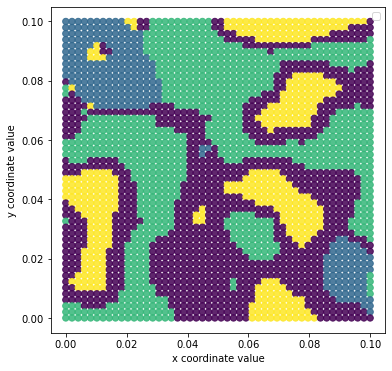

In [71]:
gmm_granite_2 = GaussianMixture(n_components = 4) 
gmm_granite_2.fit(new_dataset)
predict = gmm_granite_2.predict(new_dataset)
new_dataset['label'] = pd.Series(predict, index=new_dataset.index)
new_dataset.columns = ['X', 'Y', 'Hardness', 'Modulus', 'label']


new_dataset.index = np.arange(1, len(new_dataset) + 1)
new_dataset.head()

plt.scatter(new_dataset["X"], new_dataset["Y"], c = new_dataset["label"], 
            cmap="viridis", alpha=0.85, s=40)
plt.legend()
plt.xlabel("x coordinate value")
plt.ylabel("y coordinate value")

In [344]:
# # obtain labels per mesh point (reuse stored model)
# Z = new_dataset['label']

# # put result into color plot
# Z = Z.values.reshape(xx.shape)
# plt.imshow(
#     Z, interpolation='nearest', cmap='Set2', alpha=0.75,
#     extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#     aspect='auto', origin='lower',
# )

## Data Interpolation

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


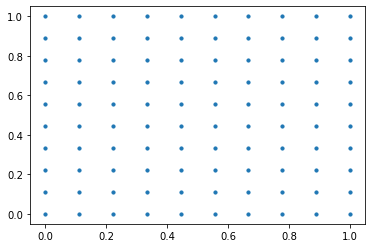

In [18]:
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
from scipy.interpolate import interpn
from scipy import interpolate

n = 10
# temp_X = np.linspace(np.min(reshape_set['X']), np.max(reshape_set['X']), n)
# temp_Y = np.linspace(np.min(reshape_set['Y']), np.max(reshape_set['Y']), n)
temp_X = np.linspace(0, 1, n)
temp_Y = np.linspace(0, 1, n)
xx, yy = np.meshgrid(temp_X, temp_Y) # x,Create grid array of y

print(temp_X)

new_X = xx.reshape(n**2,)
new_Y = yy.reshape(n**2,)
plt.scatter(new_X, new_Y, s = 10) # linear create new points in 2d space

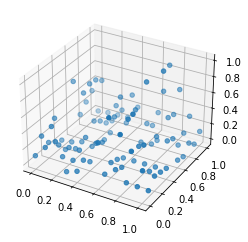

In [179]:
type = 'linear'
roundset = reshape_set
roundset['X'] = round(roundset['X'], 1)
roundset['Y'] = round(roundset['Y'], 1)
roundset_hardness = roundset[['X', 'Y', 'Hardness']].values.reshape(10,10,3)
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(roundset['X'],roundset['Y'], roundset['Hardness'])

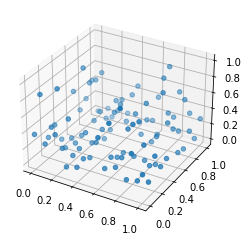

In [180]:
roundset_modulus = roundset[['X', 'Y', 'Modulus']].values.reshape(10,10,3)
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(roundset['X'],roundset['Y'], roundset['Modulus'])

In [181]:
unique_x = roundset['X'].unique().reshape(10)
unique_y = roundset['Y'].unique().reshape(10)
print(unique_x.shape)
h = roundset_hardness[:,:,2]
m = roundset_modulus[:,:,2]
print(h.shape)

# h = roundset['Hardness'].values.reshape(100,)
# m = roundset['Modulus'].values.reshape(100,)

type = "linear"

f_h = interpolate.interp2d(unique_x, unique_y, h, kind=type)
f_m = interpolate.interp2d(unique_x, unique_y, m, kind=type)

new_hardness = f_h(new_X, new_Y)
new_modulus = f_m(new_X, new_Y)

# new_hardness = f_h(temp_X, temp_Y)
# new_modulus = f_m(temp_X, temp_Y)
new_dataset = pd.DataFrame([new_X, new_Y, new_hardness[0,:], new_modulus[0,:]]).T
# print(new_dataset)
new_dataset

(10,)
(10, 10)


,0,1,2,3
0,0.000000,0.0,0.101479,0.372610
1,0.111111,0.0,0.101479,0.372610
2,0.222222,0.0,0.101479,0.372610
3,0.333333,0.0,0.101479,0.372610
4,0.444444,0.0,0.101479,0.372610
...,...,...,...,...
95,0.555556,1.0,0.335866,0.287939
96,0.666667,1.0,0.335866,0.287939
97,0.777778,1.0,0.335866,0.287939
98,0.888889,1.0,0.335866,0.287939


In [182]:
# f_hardness = interp2d(reshape_set['X'], reshape_set['Y'], reshape_set['Hardness'], kind = type)
#####====================================================================================================

f_hardness = interp2d(reshape_set['X'], reshape_set['Y'], reshape_set['Hardness'], kind = type)
new_hardness = f_hardness(new_X, new_Y)
f_modulus = interp2d(reshape_set['X'], reshape_set['Y'], reshape_set['Modulus'], kind = type)
new_modulus = f_modulus(new_X, new_Y)
new_dataset = pd.DataFrame([new_X, new_Y, new_hardness[0,:], new_modulus[0,:]])
new_dataset = new_dataset.T
new_dataset.head()

,0,1,2,3
0,0.000000,0.0,0.101479,0.37261
1,0.111111,0.0,0.101479,0.37261
2,0.222222,0.0,0.101479,0.37261
3,0.333333,0.0,0.101479,0.37261
4,0.444444,0.0,0.101479,0.37261


In [183]:
gmm_granite_2 = GaussianMixture(n_components = 4) 
gmm_granite_2.fit(new_dataset)
predict = gmm_granite_2.predict(new_dataset)
new_dataset['label'] = pd.Series(predict, index=new_dataset.index)
new_dataset.columns = ['X', 'Y', 'Hardness', 'Modulus', 'label']

new_dataset.index = np.arange(1, len(new_dataset) + 1)
new_dataset.head()

,X,Y,Hardness,Modulus,label
1,0.000000,0.0,0.101479,0.37261,0
2,0.111111,0.0,0.101479,0.37261,0
3,0.222222,0.0,0.101479,0.37261,0
4,0.333333,0.0,0.101479,0.37261,0
5,0.444444,0.0,0.101479,0.37261,0


No handles with labels found to put in legend.


Text(0, 0.5, 'y coordinate value')

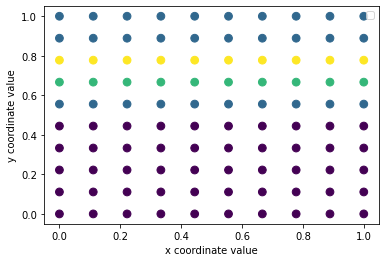

In [184]:
plt.scatter(new_dataset["X"], new_dataset["Y"], c = new_dataset["label"], s = 60)
plt.legend()
plt.xlabel("x coordinate value")
plt.ylabel("y coordinate value")

In [185]:
# # Griddata method
# # same as above
# n = 30
# temp_X = np.linspace(0, 1, n)
# temp_Y = np.linspace(0, 1, n)
# xx, yy = np.meshgrid(temp_X, temp_Y) # x,Create grid array of y
# knew_xy_coord = reshape_set[['X', 'Y']].values
# print(knew_xy_coord.shape)
# # knew_values = reshape_set['Hardness'].values
# knew_values = granite_remoevd["label"]

In [186]:
# from scipy.interpolate import griddata
# result = griddata(points=knew_xy_coord, values=knew_values, xi=(xx, yy), method='linear')
# result.shape

In [187]:
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111)
# ax.set_aspect('equal', adjustable='box') # wants the x and y aspect ratios to be the same.
# ax.contourf(xx, yy, result, cmap='jet')
# plt.show()

In [188]:
knew_hardness = granite_remoevd["Hardness"]
knew_modulus = granite_remoevd["Modulus"]

m = "nearest"
result_hardness = griddata(points=knew_xy_coord, values=knew_hardness, xi=(yy,xx), method=m)
result_modulus = griddata(points=knew_xy_coord, values=knew_modulus, xi=(xx, yy), method=m)
# print(np.isnan(result_hardness).sum())

In [189]:
new = np.array([xx, yy, result_hardness, result_modulus]).T
new = new.reshape(n**2,4)
new = pd.DataFrame(new)
new.head()

,0,1,2,3
0,0.0,0.000000,0.101479,0.372610
1,0.0,0.111111,0.247969,0.801430
2,0.0,0.222222,0.362170,0.194817
3,0.0,0.333333,0.024116,0.286715
4,0.0,0.444444,0.071807,0.031762


In [190]:
new.index = np.arange(1, len(new) + 1)
new.columns = ["X", "Y", "Hardness", "Modulus"]

In [198]:
gmm_granite_2 = GaussianMixture(n_components = 4) 
gmm_granite_2.fit(new)
predict = gmm_granite_2.predict(new)
new['label'] = pd.Series(predict, index=new.index)
new.columns = ['X', 'Y', 'Hardness', 'Modulus', 'label']

new.index = np.arange(1, len(new) + 1)
new.head()

,X,Y,Hardness,Modulus,label
1,0.0,0.000000,0.101479,0.372610,0
2,0.0,0.111111,0.247969,0.801430,0
3,0.0,0.222222,0.362170,0.194817,0
4,0.0,0.333333,0.024116,0.286715,0
5,0.0,0.444444,0.071807,0.031762,0


No handles with labels found to put in legend.


Text(0, 0.5, 'y coordinate value')

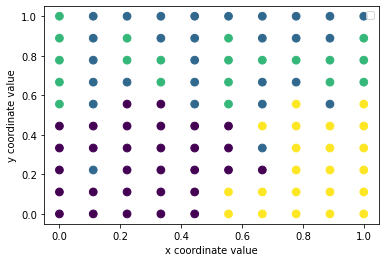

In [199]:
plt.scatter(new["X"], new["Y"], c = new["label"], s = 60)
plt.legend()
plt.xlabel("x coordinate value")
plt.ylabel("y coordinate value")

In [204]:
sub_new = new[['X', 'Y', 'label']]
sub_new_3 = sub_new.values.reshape(n,n,3)

sub_new_3_label = sub_new_3[:,:,2]
sub_new_3_label

array([[0., 0., 0., 0., 0., 2., 2., 2., 2., 2.],
       [0., 0., 1., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 2., 2., 1.],
       [0., 0., 0., 0., 0., 0., 2., 2., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [3., 3., 0., 0., 0., 2., 2., 2., 2., 1.],
       [3., 3., 0., 1., 3., 1., 1., 2., 1., 1.],
       [3., 3., 3., 3., 3., 3., 1., 2., 1., 1.],
       [3., 3., 3., 3., 3., 1., 2., 2., 1., 1.],
       [3., 3., 3., 3., 3., 3., 2., 2., 2., 1.]])

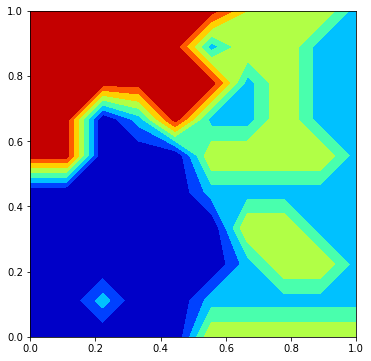

In [203]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box') # wants the x and y aspect ratios to be the same.
ax.contourf(xx, yy, sub_new_3_label, cmap='jet')
plt.show()